In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [2]:
#Uploading the CSV file
df = pd.read_csv("C:\\Users\\lavle\\Desktop\\Open food facts.csv", encoding = 'utf8')
#Remove products which do not have any product code(key field)
df  = df[df.code.isnull() == False]
df.isnull().sum()
df.head()

C:\Users\lavle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087.0,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094.0,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(df.columns)

[u'code',
 u'url',
 u'creator',
 u'created_t',
 u'created_datetime',
 u'last_modified_t',
 u'last_modified_datetime',
 u'product_name',
 u'generic_name',
 u'quantity',
 u'packaging',
 u'packaging_tags',
 u'brands',
 u'brands_tags',
 u'categories',
 u'categories_tags',
 u'categories_en',
 u'origins',
 u'origins_tags',
 u'manufacturing_places',
 u'manufacturing_places_tags',
 u'labels',
 u'labels_tags',
 u'labels_en',
 u'emb_codes',
 u'emb_codes_tags',
 u'first_packaging_code_geo',
 u'cities',
 u'cities_tags',
 u'purchase_places',
 u'stores',
 u'countries',
 u'countries_tags',
 u'countries_en',
 u'ingredients_text',
 u'allergens',
 u'allergens_en',
 u'traces',
 u'traces_tags',
 u'traces_en',
 u'serving_size',
 u'no_nutriments',
 u'additives_n',
 u'additives',
 u'additives_tags',
 u'additives_en',
 u'ingredients_from_palm_oil_n',
 u'ingredients_from_palm_oil',
 u'ingredients_from_palm_oil_tags',
 u'ingredients_that_may_be_from_palm_oil_n',
 u'ingredients_that_may_be_from_palm_oil',
 u'ing

In [5]:
df = df[['code',
'created_datetime',
'last_modified_datetime',
'product_name',
'quantity',
'packaging_tags',
'brands',
'brands_tags',
'categories_en',
'origins_tags',
'manufacturing_places_tags',
'first_packaging_code_geo',
'purchase_places',
'countries_en',
'ingredients_text',
'serving_size',
'main_category_en',
'energy_100g',
'fat_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'calcium_100g',
'iron_100g',
'carbon-footprint_100g']]
df.shape

(356001, 26)

In [6]:
import datetime

In [7]:
df.created_datetime = pd.to_datetime(df['created_datetime'])
df.head()

,code,created_datetime,last_modified_datetime,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,...,main_category_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g
0,3087,2016-09-17 09:17:46,2016-09-17T09:18:13Z,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2243.0,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN
2,4559,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,...,NaN,1941.0,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN
3,16087,2017-03-09 10:35:31,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,...,NaN,2540.0,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN
4,16094,2017-03-09 10:34:13,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,...,NaN,1552.0,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN


In [8]:
df['year'] = df['created_datetime'].dt.year
df['month'] = df['created_datetime'].dt.month
df = df[df.year.isnull() == False]
df = df[df.month.isnull() == False]
df.year = df.year.astype(int)
df.month = df.month.astype(int)
df.head()

,code,created_datetime,last_modified_datetime,product_name,quantity,packaging_tags,brands,brands_tags,categories_en,origins_tags,...,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,calcium_100g,iron_100g,carbon-footprint_100g,year,month
0,3087,2016-09-17 09:17:46,2016-09-17T09:18:13Z,Farine de blÃ© noir,1kg,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,9
1,4530,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,...,28.57,64.29,14.29,3.6,3.57,0.000,0.00129,NaN,2017,3
2,4559,2017-03-09 14:32:37,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,...,17.86,60.71,17.86,7.1,17.86,0.071,0.00129,NaN,2017,3
3,16087,2017-03-09 10:35:31,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,...,57.14,17.86,3.57,7.1,17.86,0.143,0.00514,NaN,2017,3
4,16094,2017-03-09 10:34:13,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,...,1.43,77.14,NaN,5.7,8.57,NaN,NaN,NaN,2017,3


In [9]:
del df['last_modified_datetime']

In [96]:
df_brands = df[['code',
'product_name',
'brands',
'brands_tags',
'categories_en',
'origins_tags',
'manufacturing_places_tags',
'first_packaging_code_geo',
'purchase_places',
'countries_en',
'year',
'month']]
df_brands.shape

(356000, 12)

In [71]:
df_brands = df_brands[df_brands['countries_en'].isnull() == False]

In [72]:
country_lc = df_brands.countries_en.str.split(',', expand=True).stack()
country_llc = pd.Series.to_frame(country_lc)
country_llc.columns = ['country']
country_llc.head()

,,country
0,0,France
1,0,United States
2,0,United States
3,0,United States
4,0,United States


In [73]:
df_country, df2_country = df_brands.align(country_llc, level=0, join='outer')
df_country[139:147]

code                         product_name              brands  \
138 0  39259                              Twix x2                 NaN   
139 0  39291            Lundberg Olde World Pilaf  Pcc Farmland Trust   
140 0  39529                       Pack de 2 Twix      Twix, Lundberg   
    1  39529                       Pack de 2 Twix      Twix, Lundberg   
141 0  39536       Organic Short Grain Brown Rice            Lundberg   
142 0  39543             Organic Sweet Brown Rice            Lundberg   
143 0  39550  Organic California White Sushi Rice            Lundberg   
144 0  39567                Organic Harvest Pilaf            Sunridge   

              brands_tags categories_en origins_tags  \
138 0                 NaN           NaN          NaN   
139 0  pcc-farmland-trust           NaN          NaN   
140 0       twix,lundberg           NaN          NaN   
    1       twix,lundberg           NaN          NaN   
141 0            lundberg           NaN          NaN   
142 0            lundberg           NaN          NaN   
143 0            lundberg           NaN          NaN   
144 0            sunridge           NaN          NaN   

      manufacturing_places_tags first_packaging_code_geo purchase_places  \
138 0                       NaN                      NaN   Roissy,France   
139 0                       NaN                      NaN             NaN   
140 0                       NaN                      NaN             NaN   
    1                       NaN                      NaN             NaN   
141 0                       NaN                      NaN             NaN   
142 0                       NaN                      NaN             NaN   
143 0                       NaN                      NaN             NaN   
144 0                       NaN                      NaN             NaN   

               countries_en  year  month  country  
138 0                France  2015      1      NaN  
139 0         United States  2017      3      NaN  
140 0  France,United States  2015      1      NaN  
    1  France,United States  2015      1      NaN  
141 0         United States  2017      3      NaN  
142 0         United States  2017      3      NaN  
143 0         United States  2017      3      NaN  
144 0         United States  2017      3      NaN

In [74]:
df_country['country'] = df2_country['country']
df_country.head()

,,code,product_name,brands,brands_tags,categories_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,purchase_places,countries_en,year,month,country
0,0,3087,Farine de blÃ© noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,France,2016,9,France
1,0,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,2017,3,United States
2,0,4559,Peanuts,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,United States,2017,3,United States
3,0,16087,Organic Salted Nut Mix,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,United States,2017,3,United States
4,0,16094,Organic Polenta,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,United States,2017,3,United States


In [75]:
del df_country['countries_en']
df_country.head()

,,code,product_name,brands,brands_tags,categories_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,purchase_places,year,month,country
0,0,3087,Farine de blÃ© noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,2016,9,France
1,0,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,3,United States
2,0,4559,Peanuts,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,2017,3,United States
3,0,16087,Organic Salted Nut Mix,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,2017,3,United States
4,0,16094,Organic Polenta,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,2017,3,United States


In [76]:
df_country.reset_index(drop=True,inplace=True)
df_country[139:147]

,code,product_name,brands,brands_tags,categories_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,purchase_places,year,month,country
139,39259,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,"Roissy,France",2015,1,France
140,39291,Lundberg Olde World Pilaf,Pcc Farmland Trust,pcc-farmland-trust,NaN,NaN,NaN,NaN,NaN,2017,3,United States
141,39529,Pack de 2 Twix,"Twix, Lundberg","twix,lundberg",NaN,NaN,NaN,NaN,NaN,2015,1,France
142,39529,Pack de 2 Twix,"Twix, Lundberg","twix,lundberg",NaN,NaN,NaN,NaN,NaN,2015,1,United States
143,39536,Organic Short Grain Brown Rice,Lundberg,lundberg,NaN,NaN,NaN,NaN,NaN,2017,3,United States
144,39543,Organic Sweet Brown Rice,Lundberg,lundberg,NaN,NaN,NaN,NaN,NaN,2017,3,United States
145,39550,Organic California White Sushi Rice,Lundberg,lundberg,NaN,NaN,NaN,NaN,NaN,2017,3,United States
146,39567,Organic Harvest Pilaf,Sunridge,sunridge,NaN,NaN,NaN,NaN,NaN,2017,3,United States


In [77]:
df_brands = df_country
df_brands.head()

,code,product_name,brands,brands_tags,categories_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,purchase_places,year,month,country
0,3087,Farine de blÃ© noir,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,2016,9,France
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,3,United States
2,4559,Peanuts,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,2017,3,United States
3,16087,Organic Salted Nut Mix,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,2017,3,United States
4,16094,Organic Polenta,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,2017,3,United States


In [78]:
df_brands = df_brands[df_brands['brands_tags'].isnull() == False]
df_brands.shape

(334454, 12)

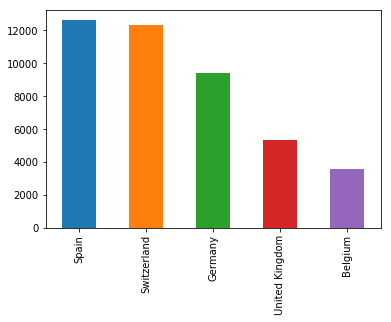

In [86]:
country = ['Switzerland', 'Belgium','Spain', 'Germany', 'United Kingdom', 'Guandeloupe']#, 'United States']
df_cntry_1 = df_brands[df_brands.country.isin(country)]
df_cntry_1 = df_cntry_1[df_cntry_1.country.isnull() == False]
df_cntry_1.sort_values(by='country', inplace=True)
df_cntry_1['country'].value_counts().plot(kind='bar')
plt.show()

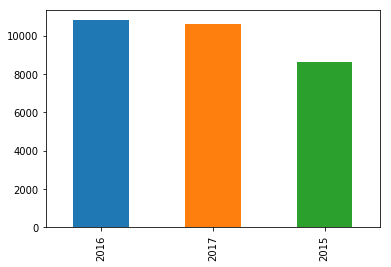

In [87]:
years = ['2015', '2016', '2017']
df_cntry_1 = df_cntry_1[df_cntry_1.year.isin(years)]
df_cntry_1.sort_values(by='year', inplace=True)
df_cntry_1['year'].value_counts().plot(kind='bar')
plt.show()

In [89]:
df_2015 = df_cntry_1[(df_cntry_1.year == 2015)]
df_2016 = df_cntry_1[(df_cntry_1.year == 2016)]
df_2017 = df_cntry_1[(df_cntry_1.year == 2017)]
df_2016 = df_2016[:8629]
df_2017 = df_2017[:8629]
df_2015.shape

(8629, 12)

In [90]:
df_cntry = [df_2015, df_2016, df_2017]
df_cntry_e = pd.concat(df_cntry)
df_cntry_e.shape

(25887, 12)

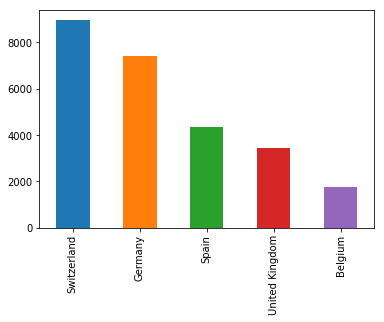

In [91]:
df_cntry_1 = df_cntry_e
df_cntry_1['country'].value_counts().plot(kind='bar')
plt.show()

In [93]:
df_bel = df_cntry_1[(df_cntry_1.country == 'Belgium')]
df_sp = df_cntry_1[(df_cntry_1.country == 'Spain')]
df_uk = df_cntry_1[(df_cntry_1.country == 'United Kingdom')]
df_de = df_cntry_1[(df_cntry_1.country == 'Germany')]
df_sw = df_cntry_1[(df_cntry_1.country == 'Switzerland')]
df_sp = df_sp[:1767]
df_uk = df_uk[:1767]
df_de = df_de[:1767]
df_sw = df_sw[:1767]
df_cntry = [df_bel, df_sp, df_uk, df_de, df_sw]
df_cntry_e = pd.concat(df_cntry)
df_cntry_e.shape

(8835, 12)

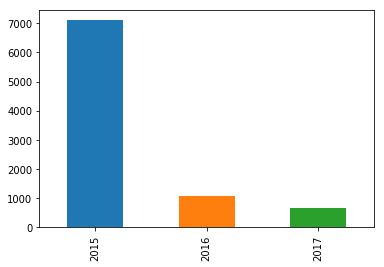

In [94]:
df_cntry_1 = df_cntry_e
df_cntry_1['year'].value_counts().plot(kind='bar')
plt.show()

In [79]:
df_brands = df_brands[df_brands.brands_tags.isnull() == False]
df_brands.shape

(334454, 12)

In [80]:
brands_lc = df_brands.brands_tags.str.split(',', expand=True).stack()
brands_llc = pd.Series.to_frame(brands_lc)
brands_llc.columns = ['brands_tags']
brands_llc.head()

,,brands_tags
0,0,ferme-t-y-r-nao
2,0,torn-glasser
3,0,grizzlies
4,0,bob-s-red-mill
5,0,unfi


In [81]:
df_brands, df2_brands = df_brands.align(brands_llc, level=0, join='outer')
df_brands[139:147]

brands    brands_tags categories_en   code        country  \
141 0  Twix, Lundberg  twix,lundberg           NaN  39529         France   
    1  Twix, Lundberg  twix,lundberg           NaN  39529         France   
142 0  Twix, Lundberg  twix,lundberg           NaN  39529  United States   
    1  Twix, Lundberg  twix,lundberg           NaN  39529  United States   
143 0        Lundberg       lundberg           NaN  39536  United States   
144 0        Lundberg       lundberg           NaN  39543  United States   
145 0        Lundberg       lundberg           NaN  39550  United States   
146 0        Sunridge       sunridge           NaN  39567  United States   

      first_packaging_code_geo manufacturing_places_tags  month origins_tags  \
141 0                      NaN                       NaN      1          NaN   
    1                      NaN                       NaN      1          NaN   
142 0                      NaN                       NaN      1          NaN   
    1                      NaN                       NaN      1          NaN   
143 0                      NaN                       NaN      3          NaN   
144 0                      NaN                       NaN      3          NaN   
145 0                      NaN                       NaN      3          NaN   
146 0                      NaN                       NaN      3          NaN   

                              product_name purchase_places  year  
141 0                       Pack de 2 Twix             NaN  2015  
    1                       Pack de 2 Twix             NaN  2015  
142 0                       Pack de 2 Twix             NaN  2015  
    1                       Pack de 2 Twix             NaN  2015  
143 0       Organic Short Grain Brown Rice             NaN  2017  
144 0             Organic Sweet Brown Rice             NaN  2017  
145 0  Organic California White Sushi Rice             NaN  2017  
146 0                Organic Harvest Pilaf             NaN  2017

In [83]:
df_brands['brands_tags'] = df2_brands['brands_tags']
df_brands[139:147]

brands brands_tags categories_en   code        country  \
141 0  Twix, Lundberg        twix           NaN  39529         France   
    1  Twix, Lundberg    lundberg           NaN  39529         France   
142 0  Twix, Lundberg        twix           NaN  39529  United States   
    1  Twix, Lundberg    lundberg           NaN  39529  United States   
143 0        Lundberg    lundberg           NaN  39536  United States   
144 0        Lundberg    lundberg           NaN  39543  United States   
145 0        Lundberg    lundberg           NaN  39550  United States   
146 0        Sunridge    sunridge           NaN  39567  United States   

      first_packaging_code_geo manufacturing_places_tags  month origins_tags  \
141 0                      NaN                       NaN      1          NaN   
    1                      NaN                       NaN      1          NaN   
142 0                      NaN                       NaN      1          NaN   
    1                      NaN                       NaN      1          NaN   
143 0                      NaN                       NaN      3          NaN   
144 0                      NaN                       NaN      3          NaN   
145 0                      NaN                       NaN      3          NaN   
146 0                      NaN                       NaN      3          NaN   

                              product_name purchase_places  year  
141 0                       Pack de 2 Twix             NaN  2015  
    1                       Pack de 2 Twix             NaN  2015  
142 0                       Pack de 2 Twix             NaN  2015  
    1                       Pack de 2 Twix             NaN  2015  
143 0       Organic Short Grain Brown Rice             NaN  2017  
144 0             Organic Sweet Brown Rice             NaN  2017  
145 0  Organic California White Sushi Rice             NaN  2017  
146 0                Organic Harvest Pilaf             NaN  2017

In [84]:
df_brands.reset_index(drop=True,inplace=True)
df_brands[139:147]

,brands,brands_tags,categories_en,code,country,first_packaging_code_geo,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year
139,"Twix, Lundberg",twix,NaN,39529,France,NaN,NaN,1,NaN,Pack de 2 Twix,NaN,2015
140,"Twix, Lundberg",lundberg,NaN,39529,France,NaN,NaN,1,NaN,Pack de 2 Twix,NaN,2015
141,"Twix, Lundberg",twix,NaN,39529,United States,NaN,NaN,1,NaN,Pack de 2 Twix,NaN,2015
142,"Twix, Lundberg",lundberg,NaN,39529,United States,NaN,NaN,1,NaN,Pack de 2 Twix,NaN,2015
143,Lundberg,lundberg,NaN,39536,United States,NaN,NaN,3,NaN,Organic Short Grain Brown Rice,NaN,2017
144,Lundberg,lundberg,NaN,39543,United States,NaN,NaN,3,NaN,Organic Sweet Brown Rice,NaN,2017
145,Lundberg,lundberg,NaN,39550,United States,NaN,NaN,3,NaN,Organic California White Sushi Rice,NaN,2017
146,Sunridge,sunridge,NaN,39567,United States,NaN,NaN,3,NaN,Organic Harvest Pilaf,NaN,2017


In [85]:
df_brands.groupby('brands_tags')['brands_tags'].count().sort_values(ascending=False)

brands_tags
carrefour                            4910
auchan                               4045
u                                    2976
marque-repere                        2875
propiedad-de                         2627
meijer                               2575
casino                               2486
leader-price                         2472
nestle                               2232
kroger                               1990
target-stores                        1591
cora                                 1509
great-value                          1493
migros                               1401
ahold                                1396
monoprix                             1383
spartan                              1342
roundy-s                             1329
coop                                 1326
picard                               1266
sans-marque                          1241
food-lion                            1235
weis                                 1230
unilever              

In [117]:
#Keeping only highest numbers of brands
search = ['carrefour', 'auchan', 'u', 'marque-repere', 'propiedad-de', 'meijer', 'casino', 'leader-price', 'nestle', 'kroger', 'target-stores', 'cora', 'great-value', 'migros', 'ahold', 'monoprix', 'spartan', 'roundy-s', 'coop', 'picard', 'sans-marque', 'food-lion', 'weis', 'unilever', 'shoprite', 'food-club', 'harris-teeter', 'wal-mart-stores-inc', 'marks-spencer', '365-everyday-value']
df_brands_top = df_brands[df_brands['brands_tags'].isin(search)]
df_brands_top.head()

,brands,brands_tags,categories_en,code,country,first_packaging_code_geo,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year
239,"Prima,//Propiedad de://,Bolton Cile EspaÃ±a S....",propiedad-de,"Groceries,Condiments,Sauces,Mustards",84154071,Spain,NaN,"las-ventas-de-retamosa,toledo-provincia,castil...",10,NaN,Salsa de mostaza,"Madrid,EspaÃ±a",2012
274,Food Club,food-club,NaN,2220,United States,NaN,NaN,3,NaN,Monterey Jack,NaN,2017
281,"Cook with M&S,Marks & Spencer",marks-spencer,"Plant-based foods and beverages,Plant-based fo...",2929,United Kingdom,NaN,NaN,2,NaN,Flat Leaf Parsley,"Southampton,United Kingdom",2015
458,Kroger,kroger,NaN,-2147483648,United States,NaN,NaN,3,NaN,Strawberry Preserves,NaN,2017
460,"Kroger, The Kroger Co.",kroger,NaN,-2147483648,United States,NaN,NaN,3,NaN,Vindaloo Sauce,NaN,2017


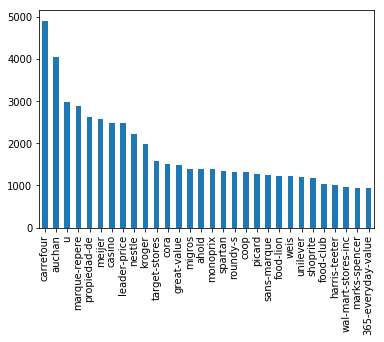

In [118]:
df_brands_top['brands_tags'].value_counts().plot(kind='bar')
plt.show()

In [119]:
#df_brands_top = df_brands_top[df_brands_top['country'].count() > '500']
df_brands_top.groupby('country')['country'].count().sort_values(ascending=False)

country
France            26685
United States     20086
Spain              2939
Switzerland        2785
United Kingdom      533
Belgium             334
Germany             107
Italy                76
Portugal             71
Guadeloupe           54
French Guiana        45
Netherlands          43
Denmark              34
Sweden               34
Brazil               30
Serbia               26
Australia            24
RÃ©union             18
Canada               18
Czech Republic       15
Luxembourg           14
Martinique           13
Poland               11
New Caledonia        11
Russia               11
Mexico               10
Greece                9
Algeria               8
Romania               7
Hong Kong             7
                  ...  
fr:Frankrijk          1
Colombia              1
Bahrain               1
fr:Griekenland        1
fr:Nederland          1
Argentina             1
Angleterre            1
Andorra               1
Allemagne             1
Saudi Arabia          1
Saint Ma

In [120]:
df_brands_top = df_brands_top[df_brands_top['first_packaging_code_geo'].isnull()== False]
df_brands_top.shape

(8476, 12)

In [121]:
df_tmp = df_brands_top['first_packaging_code_geo']
df_tmp.head()

41429     48.916667,-0.483333
133574     47.316667,5.016667
133575     47.316667,5.016667
137445     47.133333,6.433333
137540        45.45,-0.433333
Name: first_packaging_code_geo, dtype: object

In [123]:
df_tmp = df_tmp['first_packaging_code_geo'].str.split(',', expand=True)
df_tmp.head()

,0,1
41429,48.916667,-0.483333
133574,47.316667,5.016667
133575,47.316667,5.016667
137445,47.133333,6.433333
137540,45.45,-0.433333


In [124]:
df_tmp.columns = ['longitude', 'latitude']
df_tmp.head()

,longitude,latitude
41429,48.916667,-0.483333
133574,47.316667,5.016667
133575,47.316667,5.016667
137445,47.133333,6.433333
137540,45.45,-0.433333


In [125]:
df_brands_top['first_packaging_code_geo'] = df_tmp['longitude']
df_brands_top['latitude'] = df_tmp['latitude']
df_brands_top.head()

,brands,brands_tags,categories_en,code,country,first_packaging_code_geo,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year,latitude
41429,"Marks & Spencer,M&S",marks-spencer,"Dairies,Cheeses,Cow Cheeses,Soft cheeses with ...",373739,France,48.916667,france,7,NaN,Camembert,"France,Paris",2017,-0.483333
133574,Marks & Spencer,marks-spencer,"Beverages,Alcoholic beverages,Liqueurs",993012,France,47.316667,france,12,NaN,Christmas Cake Flavour Liqueur,NaN,2015,5.016667
133575,Marks & Spencer,marks-spencer,"Beverages,Alcoholic beverages,Liqueurs",993012,United Kingdom,47.316667,france,12,NaN,Christmas Cake Flavour Liqueur,NaN,2015,5.016667
137445,Monoprix,monoprix,"Fresh foods,Dairies,Labeled products,Cheeses,C...",-2147483648,France,47.133333,societe-des-affineurs-franc-comtois-reunis-za-...,5,"affine-par,fromageries-marcel-petite-22-rue-be...",ComtÃ© Au Lait Cru (34 % MG),"Paris,France",2015,6.433333
137540,"Sans marque,Delabli",sans-marque,"Seafood,Fishes,Frozen foods,Cods",-2147483648,France,45.45,NaN,4,"atlantique-nord-est,mer-de-norvege,mer-du-nord...",Morue salÃ©e sÃ©chÃ©e,"Miribel,France",2016,-0.433333


In [129]:
df_brands_top.rename(columns = {'first_packaging_code_geo':'longitude'}, inplace=True)
df_brands_top.head()

,brands,brands_tags,categories_en,code,country,longitude,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year,latitude
41429,"Marks & Spencer,M&S",marks-spencer,"Dairies,Cheeses,Cow Cheeses,Soft cheeses with ...",373739,France,48.916667,france,7,NaN,Camembert,"France,Paris",2017,-0.483333
133574,Marks & Spencer,marks-spencer,"Beverages,Alcoholic beverages,Liqueurs",993012,France,47.316667,france,12,NaN,Christmas Cake Flavour Liqueur,NaN,2015,5.016667
133575,Marks & Spencer,marks-spencer,"Beverages,Alcoholic beverages,Liqueurs",993012,United Kingdom,47.316667,france,12,NaN,Christmas Cake Flavour Liqueur,NaN,2015,5.016667
137445,Monoprix,monoprix,"Fresh foods,Dairies,Labeled products,Cheeses,C...",-2147483648,France,47.133333,societe-des-affineurs-franc-comtois-reunis-za-...,5,"affine-par,fromageries-marcel-petite-22-rue-be...",ComtÃ© Au Lait Cru (34 % MG),"Paris,France",2015,6.433333
137540,"Sans marque,Delabli",sans-marque,"Seafood,Fishes,Frozen foods,Cods",-2147483648,France,45.45,NaN,4,"atlantique-nord-est,mer-de-norvege,mer-du-nord...",Morue salÃ©e sÃ©chÃ©e,"Miribel,France",2016,-0.433333


In [1]:
from mpl_toolkits.basemap import Basemap

In [114]:
from pylab import rcParams

In [95]:
import plotly.plotly as py

In [122]:
df_b_2015 = df_brands[df_brands.year.isin(['2015'])]
df_b_2015.shape

(35580, 12)

In [123]:
brands_lc = df_b_2015.brands_tags.str.split(',', expand=True).stack()
brands_llc = pd.Series.to_frame(brands_lc)
brands_llc.columns = ['brands_tags']
brands_llc.head()

brands_tags
140 0              twix
    1          lundberg
184 0  bertrand-lejeune
185 0               a-w
249 0               7up

In [124]:
df_b_2015, df2_brands = df_b_2015.align(brands_llc, level=0, join='outer')
df_b_2015.head()

brands       brands_tags  \
140 0    Twix, Lundberg     twix,lundberg   
    1    Twix, Lundberg     twix,lundberg   
184 0  Bertrand Lejeune  bertrand-lejeune   
185 0               A&W               a-w   
249 0       7Up,Pepsico       7up,pepsico   

                                           categories_en      code  \
140 0                                                NaN     39529   
    1                                                NaN     39529   
184 0  Plant-based foods and beverages,Plant-based fo...   5200016   
185 0  Beverages,Carbonated drinks,Sodas,Sugared beve...   7020254   
249 0  Plant-based foods and beverages,Beverages,Plan...  87177756   

               countries_en first_packaging_code_geo  \
140 0  France,United States                      NaN   
    1  France,United States                      NaN   
184 0                France                      NaN   
185 0                France                      NaN   
249 0                France                      NaN   

      manufacturing_places_tags  month origins_tags       product_name  \
140 0                       NaN      1          NaN     Pack de 2 Twix   
    1                       NaN      1          NaN     Pack de 2 Twix   
184 0                       NaN      9          NaN  lentilles vertes    
185 0                etats-unis      1          NaN          Root Beer   
249 0                       NaN      6          NaN                7Up   

          purchase_places  year  
140 0                 NaN  2015  
    1                 NaN  2015  
184 0                 NaN  2015  
185 0              France  2015  
249 0  CourriÃ¨res,France  2015

In [125]:
df_b_2015['brands_tags'] = df2_brands['brands_tags']
df_b_2015.head()

brands       brands_tags  \
140 0    Twix, Lundberg              twix   
    1    Twix, Lundberg          lundberg   
184 0  Bertrand Lejeune  bertrand-lejeune   
185 0               A&W               a-w   
249 0       7Up,Pepsico               7up   

                                           categories_en      code  \
140 0                                                NaN     39529   
    1                                                NaN     39529   
184 0  Plant-based foods and beverages,Plant-based fo...   5200016   
185 0  Beverages,Carbonated drinks,Sodas,Sugared beve...   7020254   
249 0  Plant-based foods and beverages,Beverages,Plan...  87177756   

               countries_en first_packaging_code_geo  \
140 0  France,United States                      NaN   
    1  France,United States                      NaN   
184 0                France                      NaN   
185 0                France                      NaN   
249 0                France                      NaN   

      manufacturing_places_tags  month origins_tags       product_name  \
140 0                       NaN      1          NaN     Pack de 2 Twix   
    1                       NaN      1          NaN     Pack de 2 Twix   
184 0                       NaN      9          NaN  lentilles vertes    
185 0                etats-unis      1          NaN          Root Beer   
249 0                       NaN      6          NaN                7Up   

          purchase_places  year  
140 0                 NaN  2015  
    1                 NaN  2015  
184 0                 NaN  2015  
185 0              France  2015  
249 0  CourriÃ¨res,France  2015

In [126]:
df_b_2015.reset_index(drop=True, inplace=True)
df_b_2015.head()

,brands,brands_tags,categories_en,code,countries_en,first_packaging_code_geo,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year
0,"Twix, Lundberg",twix,NaN,39529,"France,United States",NaN,NaN,1,NaN,Pack de 2 Twix,NaN,2015
1,"Twix, Lundberg",lundberg,NaN,39529,"France,United States",NaN,NaN,1,NaN,Pack de 2 Twix,NaN,2015
2,Bertrand Lejeune,bertrand-lejeune,"Plant-based foods and beverages,Plant-based fo...",5200016,France,NaN,NaN,9,NaN,lentilles vertes,NaN,2015
3,A&W,a-w,"Beverages,Carbonated drinks,Sodas,Sugared beve...",7020254,France,NaN,etats-unis,1,NaN,Root Beer,France,2015
4,"7Up,Pepsico",7up,"Plant-based foods and beverages,Beverages,Plan...",87177756,France,NaN,NaN,6,NaN,7Up,"CourriÃ¨res,France",2015


In [127]:
df_b_2015.groupby('brands_tags')['brands_tags'].count().sort_values(ascending=False)

brands_tags
carrefour                           1056
auchan                               749
marque-repere                        747
casino                               538
u                                    499
leader-price                         458
cora                                 447
sans-marque                          422
propiedad-de                         419
nestle                               406
sainsbury-s                          328
monoprix                             315
aldi                                 284
picard                               224
netto                                211
dia                                  202
danone                               199
winny                                195
fleury-michon                        140
marks-spencer                        129
lindt                                119
coles                                115
lu                                   115
knorr                                109
by-s

In [128]:
#Keeping only highest numbers of brands
search = ['carrefour','auchan','marque-repere','casino','u','leader-price','cora','sans-marque','propiedad-de','nestle','sainsbury-s','monoprix','aldi','picard','netto','dia','danone','winny','fleury-michon','marks-spencer','lindt','coles','lu','knorr','by-sainsbury-s','unilever','alnatura','gut-gunstig']
df_b_2015 = df_b_2015[df_b_2015['brands_tags'].isin(search)]
df_b_2015.head()

,brands,brands_tags,categories_en,code,countries_en,first_packaging_code_geo,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year
8,"Cook with M&S,Marks & Spencer",marks-spencer,"Plant-based foods and beverages,Plant-based fo...",2929,United Kingdom,NaN,NaN,2,NaN,Flat Leaf Parsley,"Southampton,United Kingdom",2015
16,Marks & Spencer,marks-spencer,"Sugary snacks,Biscuits and cakes,Biscuits,Cook...",11686,France,NaN,royaume-uni,2,NaN,All Butter Sultana Cookies,"Royaume-Uni,France,Paris,Londres",2015
17,Marks & Spencer,marks-spencer,"Sugary snacks,Biscuits and cakes,Biscuits,Cookies",11693,"France,United Kingdom",NaN,royaume-uni,8,NaN,All Butter Belgian White Chocolate Chunk Cookies,"Royaume-Uni,Londres",2015
18,Marks & Spencer,marks-spencer,"Sugary snacks,Biscuits and cakes,Biscuits,Cook...",11709,"France,United Kingdom",NaN,royaume-uni,2,NaN,All Butter Fruity Flapjack Cookies,"Royaume-Uni,France",2015
19,Marks & Spencer,marks-spencer,"Sugary snacks,Biscuits and cakes,Biscuits,Cookies",11730,"France,United Kingdom",NaN,royaume-uni,2,NaN,All butter Cranberry & Orange Cookies,"Royaume-Uni,Londres",2015


In [129]:
df_b_2015 = df_b_2015[df_b_2015['first_packaging_code_geo'].isnull() == False]

In [130]:
df_tmp = df_b_2015['first_packaging_code_geo']
df_tmp.head()

2184    47.316667,5.016667
2694    47.133333,6.433333
2705    46.036666,4.068888
2717         50.3,3.916667
2727            46.9,-1.25
Name: first_packaging_code_geo, dtype: object

In [131]:
df_tmp = df_tmp.to_frame()

In [132]:
df_tmp = df_tmp['first_packaging_code_geo'].str.split(',', expand=True)
df_tmp.head()

,0,1
2184,47.316667,5.016667
2694,47.133333,6.433333
2705,46.036666,4.068888
2717,50.3,3.916667
2727,46.9,-1.25


In [133]:
df_tmp.columns = ['longitude', 'latitude']
df_tmp.head(2)

,longitude,latitude
2184,47.316667,5.016667
2694,47.133333,6.433333


In [134]:
df_b_2015['first_packaging_code_geo'] = df_tmp['longitude']
df_b_2015['latitude'] = df_tmp['latitude']
df_b_2015.head(2)

,brands,brands_tags,categories_en,code,countries_en,first_packaging_code_geo,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year,latitude
2184,Marks & Spencer,marks-spencer,"Beverages,Alcoholic beverages,Liqueurs",993012,"France,United Kingdom",47.316667,france,12,NaN,Christmas Cake Flavour Liqueur,NaN,2015,5.016667
2694,Monoprix,monoprix,"Fresh foods,Dairies,Labeled products,Cheeses,C...",-2147483648,France,47.133333,societe-des-affineurs-franc-comtois-reunis-za-...,5,"affine-par,fromageries-marcel-petite-22-rue-be...",ComtÃ© Au Lait Cru (34 % MG),"Paris,France",2015,6.433333


In [136]:
df_b_2015.rename(columns = {'first_packaging_code_geo': 'longitude'}, inplace=True)
df_b_2015.head(1)

,brands,brands_tags,categories_en,code,countries_en,longitude,manufacturing_places_tags,month,origins_tags,product_name,purchase_places,year,latitude
2184,Marks & Spencer,marks-spencer,"Beverages,Alcoholic beverages,Liqueurs",993012,"France,United Kingdom",47.316667,france,12,NaN,Christmas Cake Flavour Liqueur,NaN,2015,5.016667


In [215]:
brands = ['carrefour','auchan','marque-repere','casino','u','leader-price','cora','sans-marque','propiedad-de','nestle','sainsbury-s','monoprix','aldi','picard','netto','dia','danone','winny','fleury-michon','marks-spencer','lindt','coles','lu','knorr','by-sainsbury-s','unilever','alnatura','gut-gunstig']
scale = 500
colors = ["rgb(0)","rgb(1)","rgb(2)","rgb(3)","rgb(4)", "rgb(5)", "rgb(6)", "rgb(7)", "rgb(8)", "rgb(9)", "rgb(10)","rgb(11)", "rgb(12)","rgb(13)", "rgb(14)","rgb(15)","rgb(16)" , "rgb(17)","rgb(18)", "rgb(19)", "rgb(20)","rgb(21)","rgb(22)","rgb(23)","rgb(24)","rgb(25)","rgb(26)","rgb(27)","lightgrey"]
cities = []

for i in brands:
    df_sub = df_b_2015[df_b_2015['brands_tags'] == i]# & df_b_2015['year'] == y]
    city = dict(
        type = 'scattergeo',
        locationmode = 'europe',
        lat = df_sub['longitude'],
        lon = df_sub['latitude'],
        #text = df_sub['brands_tags'][i],
        marker = dict(
            size = df_sub['brands_tags'].value_counts(),
            #color = colors[i],
            #line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ), name = i)
    cities.append(city)

In [227]:
layout = dict(
        title = 'Brands in France(2015)',
        showlegend = True,
        geo = dict(
            scope='europe',
            projection=dict( type='europe' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

In [228]:
fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='brands consumption for each country(2015)' )